# 数据探索

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime, timedelta

## 载入数据

In [3]:
df = pd.read_excel('test_data.xls')

In [4]:
# 记录数量
len(df)

5881

In [5]:
# 显示所有字段名字
df.columns

Index([u'ship_name', u'ship_mobile', u'order_id', u'total_amount',
       u'final_amount', u'pay_status', u'ship_status', u'is_delivery',
       u'try_order', u'erp_order_id', u'erp_status', u'createtime',
       u'last_modified', u'payment', u'shipping_id', u'shipping', u'member_id',
       u'promotion_type', u'group_id', u'groupOn_id', u'is_leader',
       u'is_prepare', u'group_num', u'status', u'confirm_delivery', u'confirm',
       u'ship_area', u'weight', u'tostr', u'itemnum', u'ip', u'ship_addr',
       u'ship_zip', u'ship_tel', u'ship_email', u'ship_time', u'cost_item',
       u'is_tax', u'tax_type', u'cost_tax', u'is_protect', u'cost_protect',
       u'cost_payment', u'currency', u'cur_rate', u'advance', u'score_u',
       u'score_g', u'discount', u'pmt_goods', u'pmt_order', u'payed',
       u'disabled', u'displayonsite', u'mark_type', u'cost_freight', u'extend',
       u'order_refer', u'addon', u'source', u'city_link', u'verify_city_link',
       u'fuzzy', u'longitude', u'lat

In [6]:
# 观察第一笔订单
df.ix[0]

ship_name                                                            姐客戶
ship_mobile                                                  16143836292
order_id                                                 170102235550041
total_amount                                                          34
final_amount                                                          34
pay_status                                                             1
ship_status                                                            1
is_delivery                                                            Y
try_order                                                          False
erp_order_id                                                           1
erp_status                                                          succ
createtime                                                    1483372544
last_modified                                                 1483855998
payment                                            

## 浏览所有字段

### ship_name 客户姓名

In [7]:
df.ship_name.map(lambda n: n[:1]).value_counts().head()

姐    453
生    160
士    144
敏     99
红     74
Name: ship_name, dtype: int64

- ship_name 可能是顾客名字的第三个字，前两个为X小姐、Y先生
- ship_name 与 ship_mobile 信息重复，可忽略

### ship_mobile 客户电话

In [8]:
len(df.ship_mobile.unique())

3790

### order_id 订单编号

In [9]:
df.order_id.count()

5881

### total_amount，df.final_amount 订单金额

In [10]:
(df.total_amount == df.final_amount).all()

True

- total_amount 与 final_amount 信息重复，可忽略其中一个

### pay_status 付款状态

In [11]:
df.pay_status.value_counts()

1    4956
0     779
5     111
4      35
Name: pay_status, dtype: int64

- 有四种付款情形，大部分为方式1

### ship_status 出货状态

In [12]:
df.ship_status.value_counts()

1    4803
0    1078
Name: ship_status, dtype: int64

- 有两种出货状态，大部分为1
- 0 是自取吗？

### is_delivery 是否出货

In [13]:
df.is_delivery.value_counts()

Y    5881
Name: is_delivery, dtype: int64

- 全部订单应为有效订单
- 分析可忽略此字段

### try_order 试单

In [14]:
df.try_order.value_counts()

False    5881
Name: try_order, dtype: int64

- 全部都不是试单
- 分析可忽略此字段

### erp_order_id ERP订单编号

In [15]:
df.erp_order_id.value_counts()

1    5316
0     565
Name: erp_order_id, dtype: int64

### erp_status ERP状态

In [16]:
df.erp_status.value_counts()

succ      5068
normal     813
Name: erp_status, dtype: int64

### createtime 订单建立时间

In [17]:
df.createtime = df.createtime.map(datetime.fromtimestamp)
df.createtime.min(), df.createtime.max()

(Timestamp('2017-01-01 06:51:11'), Timestamp('2017-03-21 19:25:09'))

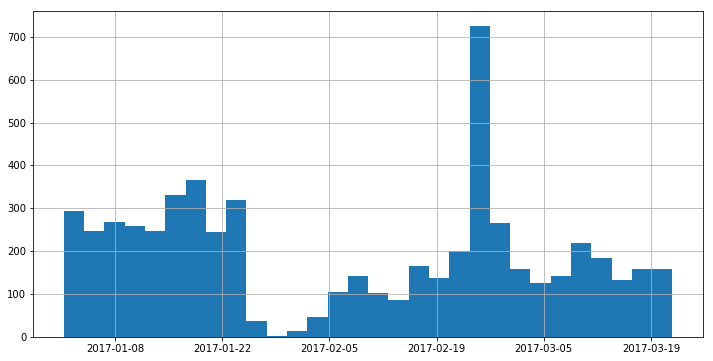

In [18]:
df.createtime.hist(bins=30, figsize=(12,6))

- 最旧的订单：'2017-01-01 06:51:11'
- 最新的订单：'2017-03-21 19:25:09'
- 春节期间（1/27~2/2）几乎没有订单
- 2/25 附近有一波订单，促销活动吗？

### last_modified 订单修改时间

In [19]:
df.last_modified = df.last_modified.map(datetime.fromtimestamp)
df.last_modified.min(), df.last_modified.max()

(Timestamp('2017-01-01 12:39:04'), Timestamp('2017-03-21 19:35:30'))

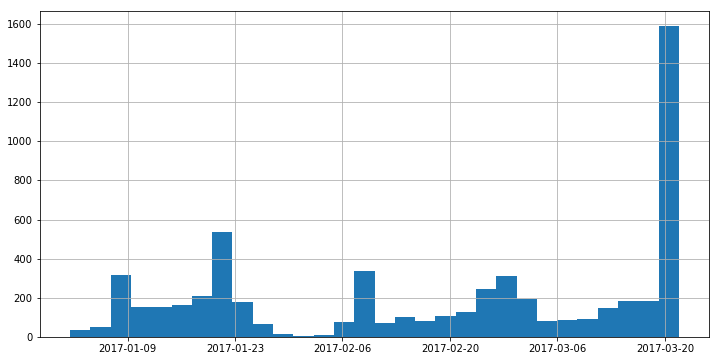

In [20]:
df.last_modified.hist(bins=30, figsize=(12,6))

- 最旧的改单：'2017-01-01 12:39:04'
- 最新的改单：'2017-03-21 19:35:30'
- 3/20 突然发生大量改单，发生什么事情？

### last_modified - createtimes 关系

In [21]:
duration = df.last_modified - df.createtime
duration.describe()

count                       5881
mean     11 days 15:47:34.614691
std      15 days 19:05:20.817236
min              0 days 00:00:09
25%              2 days 14:19:25
50%              3 days 17:22:04
75%             16 days 06:00:52
max             78 days 07:22:17
dtype: object

- last_modified - createtimes 时间差很奇怪，平均11天多，最长78天

### payment 支付方式

In [22]:
df.payment.value_counts()

wxpayjsapi    3256
online         835
alipay         639
wxsmpay        564
-1             515
deposit         72
Name: payment, dtype: int64

- 大部分为微信支付
- “-1” 是什么情形？

### shipping_id 运送单位？

In [23]:
df.shipping_id.value_counts()

1    5881
Name: shipping_id, dtype: int64

- 全部同一个值
- 猜测目前是自行配送
- 分析可忽略此字段

### shipping 运送方式

In [24]:
df.shipping.value_counts()

冷链直供      4905
一米市集直送     976
Name: shipping, dtype: int64

- 冷链的条件：肉品？高单价？客户付费？

### member_id 会员编号

In [25]:
# 判断 ship_mobile 与 member_id 是否一对一关系
members = df[['ship_mobile','member_id']].drop_duplicates()
members.ship_mobile.duplicated().any()

True

In [26]:
members.groupby('ship_mobile').member_id.count().sort_values()[-5:]

ship_mobile
16143651264    3
17015710353    3
16165837240    3
16165985610    3
17112128686    4
Name: member_id, dtype: int64

In [27]:
members.groupby('member_id').ship_mobile.count().sort_values()[-5:]

member_id
107911    2
88384     2
86235     2
90928     2
100459    3
Name: ship_mobile, dtype: int64

- 有一支手机门号注册多个会员的情形：新会员有优惠？注册系统允许？
- 有一个会员使用多个手机门号的情形：代订？送礼？

### promotion_type 促销类型

In [28]:
df.promotion_type.value_counts()

normal     5114
group       703
prepare      42
card         22
Name: promotion_type, dtype: int64

分为：正常、团购、预购、礼物卡（猜测）

### group_id 分组编号

In [29]:
groups = df.groupby('group_id')['ship_mobile'].unique().map(len).sort_values(ascending=False)
len(groups)

375

In [30]:
groups.head()

group_id
0                   3394
1702257995121197       4
1702258000845827       4
1702258027560606       4
1702247905571083       4
Name: ship_mobile, dtype: int64

In [31]:
len(df[df.group_id != 0])

674

- 总共 375 个分组
- 最多的 group_id=0，3394个会员

In [32]:
# groupid 不为 0 的五笔订单
other_groups = df[df.group_id != 0]
other_groups.head()

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
49,韵客戶,16165932641,170223222858570,109.0,109.0,1,1,Y,False,1,...,0,121.449223,31.271176,False,17022322285857080738,True,1,NaN,simplified_chinese,display
72,红客戶,16143545425,170222203645822,109.0,109.0,1,1,Y,False,1,...,0,121.376013,31.165447,False,17022220364582253518,True,1,NaN,simplified_chinese,display
73,红客戶,16143545425,170222210177262,109.0,109.0,1,1,Y,False,1,...,0,121.589999,31.205951,False,17022221017726249493,True,1,NaN,simplified_chinese,display
255,慧客戶,16087220425,170223213654478,109.0,109.0,1,1,Y,False,1,...,0,NaN,NaN,False,17022321365447844006,True,1,NaN,simplified_chinese,display
256,慧客戶,16087220425,170226102100615,109.0,109.0,1,1,Y,False,1,...,0,121.568156,31.234188,False,17022610210061535330,True,1,NaN,simplified_chinese,display


In [33]:
other_groups.total_amount.value_counts()

109.00    664
0.01       10
Name: total_amount, dtype: int64

- 不清楚怎么划分 group 的
- and，找到两个神秘的消费金额 109 跟 0.01

### groupOn_id 团购编号

In [34]:
df.groupOn_id.value_counts()

0           5178
44930407     436
45392678     255
71845949       5
62071368       3
26225378       1
69258047       1
30016813       1
54615095       1
Name: groupOn_id, dtype: int64

In [35]:
df[df.groupOn_id == 44930407].head()

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
49,韵客戶,16165932641,170223222858570,109.0,109.0,1,1,Y,False,1,...,0,121.449223,31.271176,False,17022322285857080738,True,1,NaN,simplified_chinese,display
72,红客戶,16143545425,170222203645822,109.0,109.0,1,1,Y,False,1,...,0,121.376013,31.165447,False,17022220364582253518,True,1,NaN,simplified_chinese,display
256,慧客戶,16087220425,170226102100615,109.0,109.0,1,1,Y,False,1,...,0,121.568156,31.234188,False,17022610210061535330,True,1,NaN,simplified_chinese,display
460,蕾客戶,16068834941,170223212450614,109.0,109.0,1,1,Y,False,1,...,0,121.566394,31.229549,False,17022321245061438334,True,1,NaN,simplified_chinese,display
595,婕客戶,16956942662,170224141049669,109.0,109.0,1,1,Y,False,1,...,0,121.326393,31.152392,False,17022414104966943145,True,1,NaN,simplified_chinese,display


In [36]:
df[df.groupOn_id == 71845949].head()

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
5776,试客戶,16131902304,170321131884200,0.01,0.01,0,0,Y,False,1,...,0,121.361239,31.224165,False,NaN,True,0,NaN,simplified_chinese,display
5872,试客戶,16143578853,170321174832520,0.01,0.01,5,0,Y,False,1,...,1,121.496072,31.227203,False,17032117483252095984,True,0,NaN,simplified_chinese,display
5877,试客戶,16131902304,170321174148126,0.01,0.01,5,0,Y,False,1,...,0,121.361239,31.224165,False,17032117414812604340,True,0,NaN,simplified_chinese,display
5878,试客戶,16131902304,170321181781984,0.01,0.01,5,0,Y,False,1,...,0,121.361239,31.224165,False,17032118178198482615,True,0,NaN,simplified_chinese,display
5879,试客戶,16131902304,170321184552421,0.01,0.01,1,0,Y,False,1,...,0,121.361239,31.224165,False,17032118455242145306,True,0,NaN,simplified_chinese,display


- 109 跟 0.01 应该是两种团购的价格
- 0.01 for 测试？

### is_leader 是否为带路货(?)

In [37]:
df.is_leader.value_counts()

0    5568
1     313
Name: is_leader, dtype: int64

In [38]:
# 带路货 vs 商品价格
df[df.is_leader == 1].total_amount.value_counts()

109.00    303
0.01       10
Name: total_amount, dtype: int64

### is_prepare

In [39]:
df.is_prepare.value_counts()

0    5881
Name: is_prepare, dtype: int64

- 不管这是什么，全部都同一个值
- 分析可忽略此字段

### group_num

In [40]:
# group_num
df.group_num.value_counts()

0    5568
3     313
Name: group_num, dtype: int64

### status 订单状态(?)

In [41]:
df.status.value_counts()

finish      4696
dead         796
active       388
pendding       1
Name: status, dtype: int64

### confirm_delivery 确认交付

In [42]:
df.confirm_delivery.value_counts()

Y    4530
N    1351
Name: confirm_delivery, dtype: int64

### confirm 确认

In [43]:
 df.confirm.value_counts()

N    5881
Name: confirm, dtype: int64

- 额... 全部都没有确认
- 分析可忽略此字段

### ship_area 出货地区

In [44]:
df.ship_area.value_counts()

mainland:上海/上海市/浦东新区:35                    1372
mainland:上海/上海市/长宁区:26                      572
mainland:上海/上海市/徐汇区:25                      567
mainland:上海/上海市/闵行区:36                      561
mainland:上海/上海市/普陀区:28                      460
mainland:上海/上海市/黄浦区:23                      365
mainland:上海/上海市/宝山区:37                      365
mainland:上海/上海市/杨浦区:31                      351
mainland:上海/上海市/静安区:27                      316
mainland:上海/上海市/虹口区:30                      214
mainland:上海/上海市/闸北区:29                      189
mainland:上海/上海市/嘉定区:38                      142
mainland:上海/上海市/松江区:41                      139
mainland:上海/上海市/青浦区:40                      110
mainland:上海/上海市/卢湾区:24                       91
mainland:上海/上海市/金山区:44                       13
mainland:上海/上海市/奉贤区:39                       11
mainland:Shanghai/Shanghai/Jingan:27          9
mainland:Shanghai/Shanghai/Xuhui:25           8
mainland:Shanghai/Shanghai/Changning:26       7
mainland:上海/上海市/南汇区:42                  

- 出货地区有中文、英文
- 可以抽取 area code

In [45]:
# 改写 ship_area
df.ship_area = df.ship_area.map(lambda area: area.split(':')[-1])
df.ship_area.value_counts()

35    1373
26     579
25     575
36     561
28     460
23     368
37     365
31     351
27     325
30     215
29     192
38     142
41     142
40     110
24      91
44      13
39      11
42       4
46       3
48       1
Name: ship_area, dtype: int64

### weight 重量

In [46]:
df.weight.describe()

count     5881.000000
mean      1233.710593
std       1404.636672
min          0.000000
25%        231.000000
50%        801.000000
75%       1535.000000
max      16377.000000
Name: weight, dtype: float64

- 平均 1233.710593 （公克吗？）
- 最轻 0 （空气？）
- 最重 16377

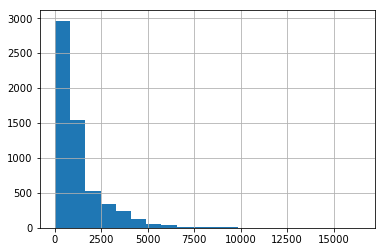

In [47]:
df.weight.hist(bins=20)

### tostr

In [48]:
df.tostr.value_counts()

订单明细介绍    5832
订单名称介绍      15
Name: tostr, dtype: int64

### itemnum

In [49]:
df.itemnum.describe()

count    5881.000000
mean        4.071246
std         4.198784
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        37.000000
Name: itemnum, dtype: float64

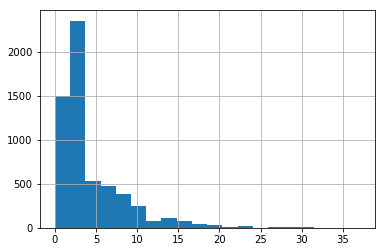

In [50]:
df.itemnum.hist(bins=20)

### ip

In [51]:
df.ip.value_counts().head(10)

139.196.30.225     4258
101.200.101.208     363
123.57.117.83       112
116.228.216.18      106
120.27.173.213       36
218.56.32.164        14
116.237.20.40        11
101.200.101.202       9
61.171.64.63          8
218.81.94.237         7
Name: ip, dtype: int64

```
WHOIS Results for：139.196.30.225
% [whois.apnic.net]
% Whois data copyright terms http://www.apnic.net/db/dbcopyright.html

% Information related to \'139.196.0.0 - 139.196.255.255\'

inetnum: 139.196.0.0 - 139.196.255.255
netname: ALISOFT
descr: Aliyun Computing Co., LTD
descr: 5F, Builing D, the West Lake International Plaza of S&T
descr: No.391 Wen\'er Road, Hangzhou, Zhejiang, China, 310099
country: CN
admin-c: ZM1015-AP
tech-c: ZM877-AP
tech-c: ZM876-AP
tech-c: ZM875-AP
mnt-by: MAINT-CNNIC-AP
mnt-irt: IRT-CNNIC-CN
status: ALLOCATED PORTABLE
changed: ipas@cnnic.cn 20140730
source: APNIC
```
主要订单都来自阿里(服务器)?

### ship_addr 出货地址

In [52]:
df.ship_addr.value_counts().head()

上海上海市长宁区芙蓉江路388弄20号301     23
上海上海市浦东新区东陆路429弄21号702     21
上海上海市闵行区古龙路287弄77号101      13
上海上海市杨浦区政和路999弄22号401室     13
上海上海市长宁区芙蓉江路388弄16号1001    12
Name: ship_addr, dtype: int64

### ship_zip 邮递区号

In [53]:
df.ship_zip.fillna(0).value_counts()

200001.0    3828
0.0         2053
Name: ship_zip, dtype: int64

### ship_tel 出货电话

In [54]:
df.ship_tel.fillna(0).value_counts().head()

0              5761
13472667545       3
18917577319       3
13301816996       3
13761086123       3
Name: ship_tel, dtype: int64

In [55]:
df[df.ship_tel == '13472667545']

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
5717,青客戶,16066609777,170315081329807,79.0,79.0,1,0,Y,False,1,...,0,121.467531,31.185439,False,17031508132980747405,True,1,NaN,simplified_chinese,display
5718,青客戶,16066609777,170315174338528,62.0,62.0,1,1,Y,False,1,...,0,121.467531,31.185439,False,17031517433852859308,True,1,NaN,simplified_chinese,display
5719,青客戶,16066609777,170315233813201,172.0,172.0,1,1,Y,False,1,...,0,121.467531,31.185439,False,17031523381320191512,True,1,NaN,simplified_chinese,display


### ship_email 出货邮件

In [56]:
df.ship_email.fillna('?').value_counts()

?    5881
Name: ship_email, dtype: int64

- 全部为空
- 分析可忽略此字段

### ship_time 出货时间

In [57]:
df.ship_time.fillna('??,??').map(lambda x: x.split(',')[1]).value_counts()

全天             1501
14:00-21:00    1429
08:00-12:00    1319
14:00-18:00     863
18:00-21:00     580
??              146
2017-02-11        7
2017-03-18        6
2017-01-14        6
2017-02-25        5
2017-03-11        4
2017-03-04        4
2017-02-17        3
2017-01-07        2
2017-01-21        2
8:00-12:00        2
2017-03-25        1
All day           1
Name: ship_time, dtype: int64

- 全天：1501
- 上午：1319
- 下午：863
- 晚上：580
- 下午以后：1429
- 有部分无效数据

### cost_item

In [58]:
df.cost_item.value_counts().head()

109.0    697
75.0     220
158.0    101
93.0      98
87.0      95
Name: cost_item, dtype: int64

### is_tax

In [59]:
df.is_tax.value_counts()

False    5302
True      579
Name: is_tax, dtype: int64

### tax_type

In [60]:
df.tax_type.value_counts()

false       5271
company      407
personal     172
Name: tax_type, dtype: int64

### cost_tax

In [61]:
df.cost_tax.value_counts()

0.0    5881
Name: cost_tax, dtype: int64

### is_protect

In [62]:
df.is_protect.value_counts()

False    5881
Name: is_protect, dtype: int64

- 都是 False
- 分析可以滤掉

### cost_protect

In [63]:
df.cost_protect.value_counts()

0.0    5881
Name: cost_protect, dtype: int64

- 都是 0
- 分析可以滤掉

### cost_payment

In [64]:
df.cost_payment.value_counts()

0.0    5164
Name: cost_payment, dtype: int64

- 都是 0
- 分析可以滤掉

### currency

In [65]:
df.currency.value_counts()

CNY    5881
Name: currency, dtype: int64

- 目前业务还在中国境内
- 分析可以滤掉

### cur_rate

In [66]:
df.cur_rate.value_counts()

1.0    5881
Name: cur_rate, dtype: int64

- 目前业务还在中国境内
- 分析可以滤掉

### advance

In [67]:
df.advance.value_counts().head()

0.0      5591
200.0      41
500.0      27
199.0       5
100.0       4
Name: advance, dtype: int64

### score_u

In [68]:
df.score_u.value_counts().head()

0.0      4041
200.0    1439
400.0      93
100.0       5
236.0       4
Name: score_u, dtype: int64

### score_g

In [69]:
df.score_g.value_counts().head()

0.0      969
18.0     120
3.0      109
15.0     108
158.0    103
Name: score_g, dtype: int64

### discount

In [70]:
df.discount.value_counts().head()

 0.0     5738
-30.0      14
-20.0       6
-56.0       6
-45.0       5
Name: discount, dtype: int64

### pmt_goods

In [71]:
df.pmt_goods.value_counts().head()

0.0     3934
2.5       51
10.0      43
6.0       30
5.4       27
Name: pmt_goods, dtype: int64

### pmt_order

In [72]:
df.pmt_order.value_counts().head()

75.0    1448
0.0      941
80.0     482
40.0     482
20.0     419
Name: pmt_order, dtype: int64

### payed

In [73]:
df.payed.describe()

count    5881.000000
mean       91.397618
std       142.283887
min         0.000000
25%         3.500000
50%        29.000000
75%       150.500000
max      5994.000000
Name: payed, dtype: float64

In [74]:
# 订单金额减折扣 ！= 付款金额
((df.total_amount + df.discount) != (df.payed)).any()

True

In [75]:
dfx = df[(df.total_amount + df.discount) != (df.payed)]
dfx.payed.value_counts().head()

0.0      880
20.0       3
160.0      2
154.0      2
4.0        2
Name: payed, dtype: int64

一堆没付款的？！

In [76]:
df[df.payed == 0].payment.value_counts()

online        835
-1            191
wxpayjsapi     81
deposit        62
wxsmpay        26
alipay         23
Name: payment, dtype: int64

### disabled

In [77]:
df.disabled.value_counts()

False    5881
Name: disabled, dtype: int64

- 意义不明
- 分析可以滤掉

### displayonsite

In [78]:
df.displayonsite.value_counts()

True     5783
False      98
Name: displayonsite, dtype: int64

### mark_type

In [79]:
df.mark_type.value_counts()

b1    5881
Name: mark_type, dtype: int64

- 意义不明
- 分析可以滤掉

### cost_freight 运费

In [80]:
df.cost_freight.value_counts()

0.0     4730
20.0     754
30.0     397
Name: cost_freight, dtype: int64

### extend

In [81]:
df.extend.value_counts()

False    5881
Name: extend, dtype: int64

- 意义不明
- 分析可以滤掉

### order_refer 推荐订单(?)

In [82]:
df.order_refer.value_counts()

local    5881
Name: order_refer, dtype: int64

- 全部为 local
- 分析可以滤掉

### addon

In [83]:
df.addon.value_counts().head()

a:2:{s:19:"order_chgpointmoney";s:4:"2.00";s:19:"order_chgpointscore";d:200;}         1216
a:2:{s:19:"order_chgpointmoney";s:4:"0.00";s:19:"order_chgpointscore";s:1:"0";}        359
a:2:{s:19:"order_chgpointmoney";s:5:"0.000";s:19:"order_chgpointscore";s:1:"0";}       164
a:2:{s:19:"order_chgpointmoney";s:4:"2.00";s:19:"order_chgpointscore";s:3:"200";}      125
a:2:{s:19:"order_chgpointmoney";s:5:"2.000";s:19:"order_chgpointscore";s:3:"200";}      98
Name: addon, dtype: int64

- 额外加入的信息
- 将来如要分析，需要再清理

### source 订单来源

In [84]:
df.source.value_counts()

weixin    3882
ios        968
pc         655
wap        376
Name: source, dtype: int64

订单来源
- 微信 （手机app?)
- iso
- pc
- wap （手机版网页）

### city_link

In [85]:
df.city_link.value_counts()

0.0    4571
1.0     651
2.0     593
Name: city_link, dtype: int64

### verify_city_link

In [86]:
df.verify_city_link.value_counts()

 0.0    3594
 1.0    1215
 2.0    1049
-1.0      17
Name: verify_city_link, dtype: int64

### fuzzy

In [87]:
df.fuzzy.value_counts()

0    5737
1     144
Name: fuzzy, dtype: int64

### longitude, latitude 经纬度

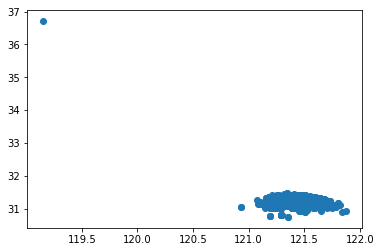

In [88]:
plt.scatter(df.longitude, df.latitude)

In [89]:
# 出现奇异点
df.latitude.describe()

count    5751.000000
mean       31.225514
std         0.101479
min        30.731911
25%        31.193277
50%        31.224399
75%        31.262443
max        36.722182
Name: latitude, dtype: float64

In [90]:
# 出现奇异点
df.longitude.describe()

count    5751.000000
mean      121.461681
std         0.095776
min       119.151498
25%       121.411999
50%       121.457887
75%       121.518593
max       121.871930
Name: longitude, dtype: float64

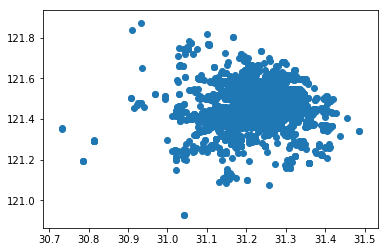

In [91]:
# 过滤奇异点
dfx = df[(df.latitude < 32) & (df.longitude > 120)]
plt.scatter(dfx.latitude, dfx.longitude)

### scalping (剥光?)

In [92]:
df.scalping.value_counts()

False    5804
True       77
Name: scalping, dtype: int64

### out_trade_no (交易流水号?)

In [93]:
df.out_trade_no.duplicated().any()

True

### autoSendErp

In [94]:
df.autoSendErp.value_counts()

True     5713
False     168
Name: autoSendErp, dtype: int64

### autoSendErpStatus

In [95]:
df.autoSendErpStatus.value_counts()

1    3623
0    2222
2      36
Name: autoSendErpStatus, dtype: int64

### string_tag_id

In [96]:
df.string_tag_id.value_counts().head()

a:0:{}                  18
a:1:{i:0;s:3:"347";}    12
a:1:{i:0;s:3:"170";}    11
a:1:{i:0;s:3:"204";}     5
a:1:{i:0;s:3:"228";}     3
Name: string_tag_id, dtype: int64

### lang 语言

In [97]:
df.lang.value_counts()

simplified_chinese    5847
english                 34
Name: lang, dtype: int64

### delivery_note_price

In [98]:
df.delivery_note_price.value_counts()

display    5530
none        351
Name: delivery_note_price, dtype: int64